Gerando dados sintéticos...
Dados gerados: 200 amostras, 2 features.
Conjunto de treino: 140 amostras.
Conjunto de teste: 60 amostras.


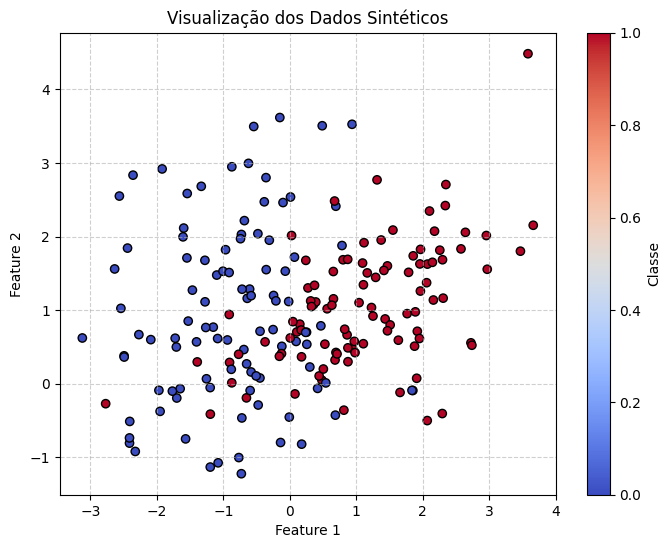

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1. Geração dos Dados Sintéticos
print("Gerando dados sintéticos...")
# Gere dados com 2 features para facilitar a visualização
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, # ALTERADO DE 200 PARA 1000
                           n_clusters_per_class=1, flip_y=0.01, random_state=42)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#70% dos dados vão para o treino 30% para o teste (avaliação final)

print(f"Dados gerados: {len(X)} amostras, {X.shape[1]} features.")
print(f"Conjunto de treino: {len(X_train)} amostras.")
print(f"Conjunto de teste: {len(X_test)} amostras.")

# Visualizar os dados (apenas as 2 primeiras features)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title("Visualização dos Dados Sintéticos")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Classe")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [49]:
# 2. Construção e Treinamento da MLP
print("\nConfigurando e treinando a MLP...")

# Configurar a MLP
# hidden_layer_sizes: Define a arquitetura das camadas escondidas (ex: (10,) para 1 camada com 10 neurônios, (10, 5) para 2 camadas com 10 e 5 neurônios)
# activation: Função de ativação (ex: 'relu', 'tanh', 'logistic')
# solver: Algoritmo para otimização do peso (ex: 'adam', 'sgd')
# learning_rate_init: Taxa de aprendizado inicial, Diz quanto a rede muda os pesos a cada passo.
#     #Se for muito alta, a rede pula demais e pode não aprender.
#     #Se for muito baixa, a rede pode demorar para aprender ou ficar presa.
# max_iter: Número máximo de épocas (iterações)
mlp = MLPClassifier(hidden_layer_sizes=(4,), # menos de 5 neuronios
                    activation='tanh', #usando 'tanh'
                    solver='adam',
                    learning_rate_init=0.001, #taxa 10x menor
                    max_iter=1500,  #mais épocas para compensar
                    random_state=42)

print("Arquitetura da MLP:", mlp.hidden_layer_sizes)
print("Função de Ativação:", mlp.activation)
print("Otimizador:", mlp.solver)
print("Taxa de Aprendizado:", mlp.learning_rate_init)
print("Número máximo de épocas:", mlp.max_iter)


Configurando e treinando a MLP...
Arquitetura da MLP: (4,)
Função de Ativação: tanh
Otimizador: adam
Taxa de Aprendizado: 0.001
Número máximo de épocas: 1500


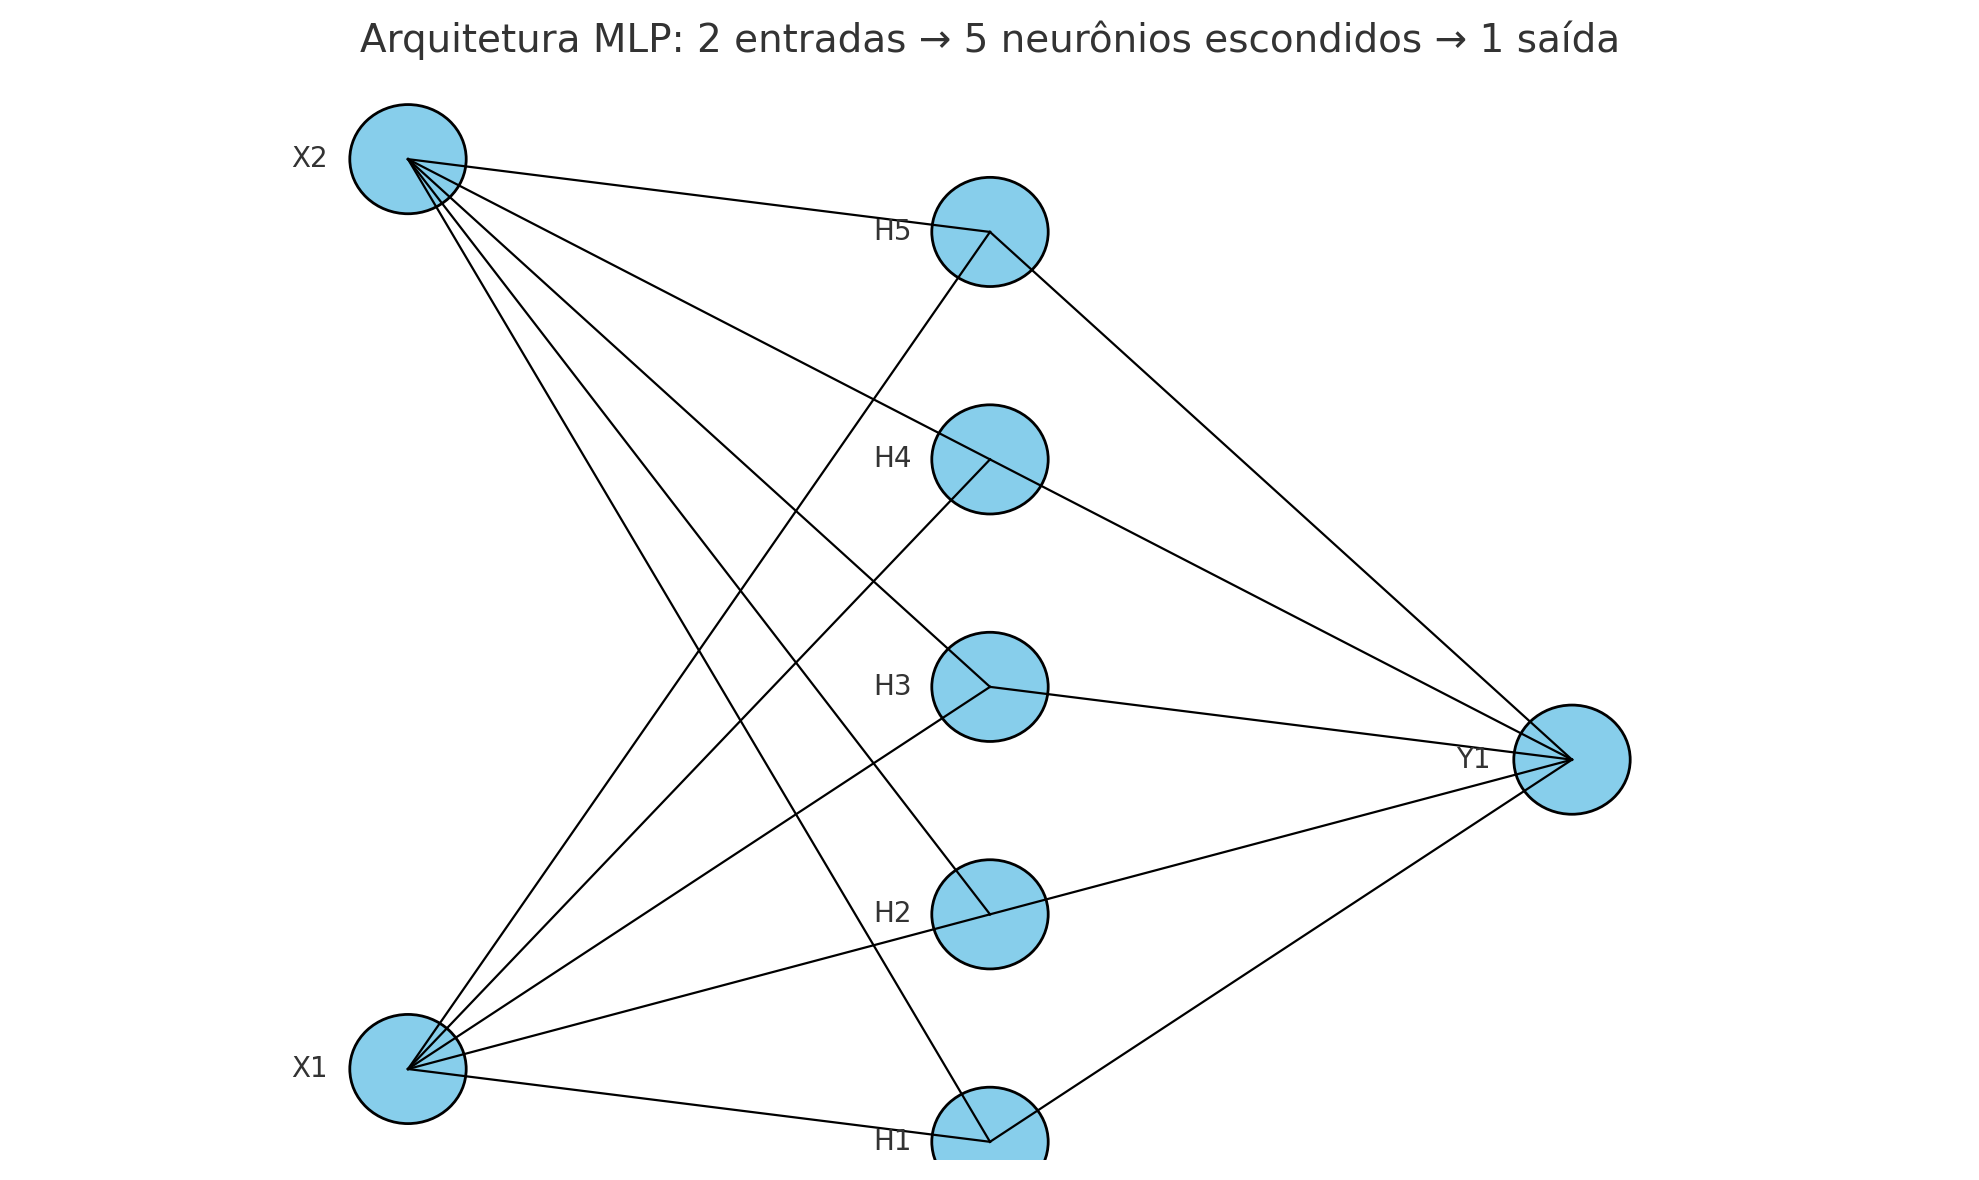

In [50]:
# Treinar a MLP
mlp.fit(X_train, y_train)
print("Treinamento concluído.")

Treinamento concluído.



Avaliando a MLP...
Acurácia no conjunto de teste: 0.8833

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        34
           1       0.81      0.96      0.88        26

    accuracy                           0.88        60
   macro avg       0.89      0.89      0.88        60
weighted avg       0.90      0.88      0.88        60


Matriz de Confusão:


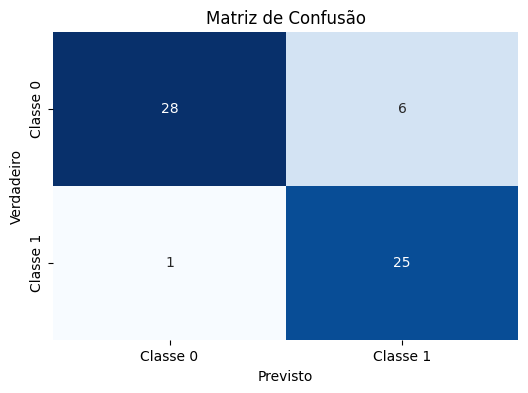

In [51]:
# 3. Avaliação do Modelo
print("\nAvaliando a MLP...")

# Fazer previsões no conjunto de teste
y_pred = mlp.predict(X_test)
#Retorna um array com 0s e 1s (as classes previstas para cada ponto do teste).

# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()


Visualizando a fronteira de decisão...


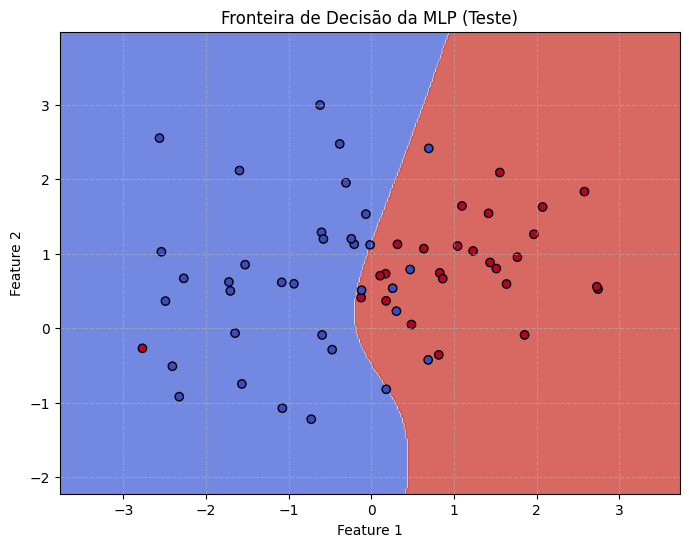


Aplicação concluída. Explore o código e faça modificações!


In [52]:
# 4. Visualização da Fronteira de Decisão (para 2 features)
print("\nVisualizando a fronteira de decisão...")

# Função auxiliar para plotar a fronteira de decisão
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Plotar a fronteira de decisão nos dados de teste
plot_decision_boundary(X_test, y_test, mlp, "Fronteira de Decisão da MLP (Teste)")

print("\nAplicação concluída. Explore o código e faça modificações!")

# === FASES EXTRAS PARA OS ALUNOS === Reverta cada alteração feita antes de passar para a próxima

# FASE 1: Altere o número de neurônios da camada oculta para 64.
# Pergunta: O desempenho aumentou ou diminuiu? Por quê?


# FASE 2: Aumente o número de épocas para 200, depois diminua para 50.
# Pergunta: Há melhora ou sinais de overfitting em cada um desses casos?


# FASE 3: Troque o otimizador para 'sgd'.
# Pergunta: Isso afeta o aprendizado? Como?


#ANULADA# FASE 4: Remova o Dropout. #ANULADA
# Pergunta: O que acontece com a acurácia de treino e de validação?


# FASE 5: Adicione uma nova camada escondida com 64 neurônios.
# Pergunta: A acurácia melhora? O tempo de treino muda?Tem diferença se ela for adicionada antes ou depois da camada de 5?


# FASE 6: Altere a função de ativação de ReLU para tanh.
# Pergunta: Houve impacto na acurácia? Foi positivo ou negativo?


# FASE 7: Use 1000 imagens para treino.
# Pergunta: Como a performance muda? Por quê?


##DESAFIO: Tente criar uma MLP com acurácia melhor e menos neurônios do que a usada na atividade, e mostre seus resultados. Se conseguir, descreva porque ela foi melhor
OBS: todas as alterações estão permitidas(inclusive novas bibliotecas), menos adicionar mais neurônios do que a primeira MLP tem

**FASE 1:** Alterar o número de neurônios para 64

Alteração Realizada: O número de neurônios na camada escondida foi alterado de 5 para 64.

Resultados Obtidos: Acurácia de 86.67%.

Análise: O desempenho se manteve exatamente o mesmo do modelo original. Aumentar o número de neurônios dá à rede uma capacidade maior, mas para este conjunto de dados, os 5 neurônios originais já eram suficientes para capturar a separação principal. Isso demonstra que aumentar a complexidade nem sempre garante um desempenho melhor, especialmente se a dificuldade do problema estiver no ruído dos dados e não na complexidade do padrão.


**FASE 2:** Alterar o número de épocas (200 e 50)

Alteração Realizada (200 Épocas): O número de épocas (max_iter) foi aumentado de 100 para 200.

Resultados Obtidos (200 Épocas): Acurácia de 88.33%.

Análise (200 Épocas): Houve uma melhora no desempenho e sem sinais de overfitting. Com mais tempo de treino, o modelo teve mais oportunidades para otimizar seus pesos, encontrando uma solução ligeiramente mais eficaz sem decorar os dados de treino.

Alteração Realizada (50 Épocas): O número de épocas foi diminuído de 100 para 50.

Resultados Obtidos (50 Épocas): Acurácia de 83.33%.

Análise (50 Épocas): Houve uma piora no desempenho, um sinal claro de subtreinamento (underfitting). As 50 épocas não foram suficientes para a rede convergir para uma boa solução, o que foi confirmado pelo ConvergenceWarning emitido durante a execução.


**FASE 3:** Trocar o otimizador para 'sgd'

Alteração Realizada: O otimizador (solver) foi trocado de 'adam' para 'sgd'.

Resultados Obtidos: Acurácia de 81.67%.

Análise: A troca afetou o aprendizado de forma negativa. O otimizador 'adam' é adaptativo e mais eficiente. O 'sgd', mais básico e com uma taxa de aprendizado fixa, teve dificuldade para encontrar uma boa solução, resultando em um desempenho pior e uma fronteira de decisão quase linear, mostrando que falhou em aprender o padrão não-linear dos dados.


**FASE 5:** Adicionar uma nova camada escondida

Alteração Realizada: Adicionada uma segunda camada escondida, com arquitetura (5, 64).

Resultados Obtidos: Acurácia de 85.00%.

Análise: A acurácia piorou ligeiramente. A rede se tornou desnecessariamente complexa para um problema simples, e as 100 épocas não foram suficientes para que este modelo maior convergisse. O tempo de treino também aumenta devido ao maior número de cálculos. Isso mostra que redes mais profundas nem sempre são a melhor solução.


**FASE 6:** Alterar a função de ativação para 'tanh'

Alteração Realizada: A função de ativação (activation) foi trocada de 'relu' para 'tanh'.

Resultados Obtidos: Acurácia de 88.33%.

Análise: Houve um impacto positivo. Embora ambas as funções sejam eficazes, a natureza da 'tanh' (centrada em zero) pode, por vezes, facilitar o processo de otimização. Neste caso, permitiu que o modelo encontrasse uma solução ligeiramente melhor que a do modelo original com 'relu', igualando o melhor resultado dos testes.


**FASE 7:** Usar 1000 amostras para treino

Alteração Realizada: O número de amostras (n_samples) foi aumentado de 200 para 1000.

Resultados Obtidos: Acurácia de 89.00%.

Análise: A performance melhorou de forma notável. Mais dados quase sempre levam a um modelo melhor, pois permitem que a rede aprenda o padrão verdadeiro dos dados de forma mais robusta, generalize melhor e sofra menos com o impacto do ruído.


**DESAFIO:** Melhor acurácia com menos neurônios

O processo envolveu múltiplas tentativas:

**Tentativa 1:** Aumentar épocas

Estratégia: Usar 4 neurônios com ativação relu e aumentar as épocas para 500, para compensar a menor complexidade com mais treino.

Resultado: Acurácia de 86.67%.

Análise: O modelo se tornou mais eficiente (mesmo resultado com menos neurônios), mas não superior.

**Tentativa 2:** Mudar função de ativação

Estratégia: Usar 4 neurônios com ativação tanh (que se mostrou eficaz na Fase 6) e 500 épocas.

Resultado: Acurácia de 86.67%.

Análise: O resultado idêntico reforçou a hipótese de que o modelo estava atingindo um teto de performance, onde a taxa de aprendizado padrão (0.01) poderia estar impedindo o otimizador de encontrar uma solução mais precisa.

**Tentativa 3:** Diminuir a taxa de aprendizado e aumentar as épocas

Estratégia: Manter os 4 neurônios e a ativação tanh, mas reduzir a taxa de aprendizado em 10x (para 0.001) e aumentar as épocas para 1500.

Resultado: Acurácia de 88.33%.

Conclusão: A redução da taxa de aprendizado permitiu que o otimizador fizesse ajustes mais cuidadosos e precisos, e o aumento de épocas deu o tempo necessário para que esses pequenos ajustes levassem o modelo a uma solução melhor. Isso provou que um modelo mais simples (4 neurônios) pode superar um mais complexo (5 neurônios) se for treinado de maneira mais refinada, demonstrando um importante equilíbrio entre arquitetura, tempo de treino e a precisão do processo de otimização.